# 개와 고양이 분류 CNN

Chollet(2018)프로그램 기반


In [1]:
import os, shutil
original_data_dir='C:/Users/ellyj/Desktop/3-1/고급통계적딥러닝/코드 및 데이터_1/제 6장 CNN의 응용과 이전학습/all_dogs_cats'
# original_data_dir로부터 일부 데이터를 추출하여 base_dir에 저장하기 위해 만듬
base_dir='C:/Users/ellyj/Desktop/3-1/고급통계적딥러닝/코드 및 데이터_1/제 6장 CNN의 응용과 이전학습/dogs and cats_small1'

os.makedirs(base_dir, exist_ok=True)
#os.mkdir(base_dir)
train_dir=os.path.join(base_dir,'train')#dog_cats_small폴더내에 train폴더 생성
#os.mkdir(train_dir)
validation_dir=os.path.join(base_dir,'validation')#dog_cats_small폴더내에 validation폴더 생성
#os.mkdir(validation_dir)
test_dir=os.path.join(base_dir,'test')#dog_cats_small폴더내에 test폴더 생성
#os.mkdir(test_dir)

train_cats_dir=os.path.join(train_dir,'cats')#train폴더내에 cats폴더 생성
#os.mkdir(train_cats_dir)
train_dogs_dir=os.path.join(train_dir,'dogs')#train폴더내에 dogs폴더 생성
#os.mkdir(train_dogs_dir)
validation_cats_dir=os.path.join(validation_dir,'cats')#validation폴더내에 cats폴더 생성
#os.mkdir(validation_cats_dir)
validation_dogs_dir=os.path.join(validation_dir,'dogs')#validation폴더내에 dogs폴더 생성
#os.mkdir(validation_dogs_dir)
test_cats_dir=os.path.join(test_dir,'cats')#test폴더내에 cats폴더 생성
#os.mkdir(test_cats_dir)
test_dogs_dir=os.path.join(test_dir,'dogs')#test폴더내에 dogs폴더 생성
#os.mkdir(test_dogs_dir)

In [2]:
fnames=['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:     # original_dat_dir에 있는 1000개의 고양이 이미지를 train_cats_dir에 copy
    src=os.path.join(original_data_dir,fname)
    dst=os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,dst)
fnames=['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:     # original_dat_dir에 있는 500개의 고양이 이미지를 validatio_cats_dir에 copy
    src=os.path.join(original_data_dir,fname)
    dst=os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,dst)
fnames=['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:     # original_dat_dir에 있는 500개의 고양이 이미지를 test_cats_dir에 copy
    src=os.path.join(original_data_dir,fname)
    dst=os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,dst)
    
fnames=['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:     # original_dat_dir에 있는 1000개의 개 이미지를 train_dogs_dir에 copy
    src=os.path.join(original_data_dir,fname)
    dst=os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,dst)
fnames=['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:     # original_dat_dir에 있는 500개의 개 이미지를 validatio_dogs_dir에 copy
    src=os.path.join(original_data_dir,fname)
    dst=os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(src,dst)
fnames=['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:     # original_dat_dir에 있는 500개의 개 이미지를 test_dogs_dir에 copy
    src=os.path.join(original_data_dir,fname)
    dst=os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src,dst)

    
print(len(os.listdir(train_cats_dir)));print(len(os.listdir(train_dogs_dir)))
print(len(os.listdir(validation_cats_dir)));print(len(os.listdir(validation_dogs_dir)))
print(len(os.listdir(test_cats_dir)));print(len(os.listdir(test_dogs_dir)))

1000
1000
500
500
500
500


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# rescale
train_datagen=ImageDataGenerator(rescale=1./255) 
test_datagen=ImageDataGenerator(rescale=1./255)

# (300,300)을 (150,150)으로 바꾸고 배치사이즈도 바꾸고
# dataframe으로 저장되어 있으면 train_datagen.flow_from_dataframe
train_generator=train_datagen.flow_from_directory(directory=train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
validation_generator=test_datagen.flow_from_directory(directory=validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

for x,y in train_generator:
    print(x.shape)
    print(y.shape)
    break

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
(20, 150, 150, 3)
(20,)


In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras import models
cat_dog_model=models.Sequential()
#train_generator에서 target_size=(150,150)으로 하였고 color_mode의 default는 'rgb'이므로 input_shape=(150,150,3)으로 지정함
cat_dog_model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
cat_dog_model.add(MaxPooling2D(2,2))
cat_dog_model.add(Conv2D(64,(3,3),activation='relu'))
cat_dog_model.add(MaxPooling2D(2,2))
cat_dog_model.add(Conv2D(128,(3,3),activation='relu'))
cat_dog_model.add(MaxPooling2D(2,2))
cat_dog_model.add(Flatten())
cat_dog_model.add(Dense(512,activation='relu')) # 여기까지 특성변수 512개 만든 거임
cat_dog_model.add(Dense(1,activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l1(0.1))) # L1 규제화, 0에 가까운거 0으로
cat_dog_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [5]:
from tensorflow.keras import optimizers
opt=optimizers.RMSprop(lr=1e-4)
cat_dog_model.compile(loss='binary_crossentropy', optimizer=opt,metrics=['acc'])

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [6]:
cat_dog_result=cat_dog_model.fit(train_generator,steps_per_epoch=100,epochs=10,
                                 validation_data=validation_generator,validation_steps=50)

Epoch 1/10
100/100 [==============================] - 143s 1s/step - loss: 3.1662 - acc: 0.5280 - val_loss: 2.8921 - val_acc: 0.6080
Epoch 2/10
100/100 [==============================] - 133s 1s/step - loss: 2.6633 - acc: 0.6190 - val_loss: 2.4307 - val_acc: 0.6460
Epoch 3/10
100/100 [==============================] - 131s 1s/step - loss: 2.2213 - acc: 0.6740 - val_loss: 2.0605 - val_acc: 0.6550
Epoch 4/10
100/100 [==============================] - 132s 1s/step - loss: 1.8435 - acc: 0.7125 - val_loss: 1.7081 - val_acc: 0.6990
Epoch 5/10
100/100 [==============================] - 127s 1s/step - loss: 1.5325 - acc: 0.7345 - val_loss: 1.4606 - val_acc: 0.6760
Epoch 6/10
100/100 [==============================] - 125s 1s/step - loss: 1.2615 - acc: 0.7570 - val_loss: 1.2006 - val_acc: 0.7020
Epoch 7/10
100/100 [==============================] - 132s 1s/step - loss: 1.0527 - acc: 0.7470 - val_loss: 1.0492 - val_acc: 0.6620
Epoch 8/10
100/100 [==============================] - 132s 1s/step - 

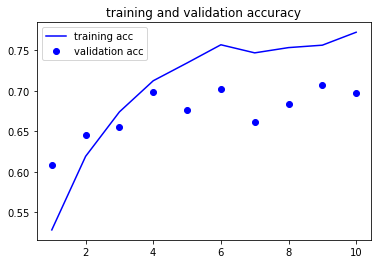

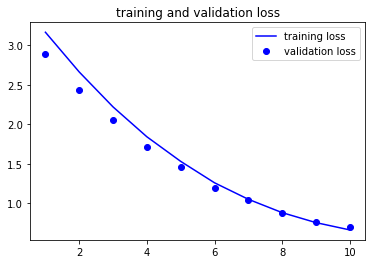

In [7]:
import matplotlib.pyplot as plt
acc=cat_dog_result.history['acc']
val_acc=cat_dog_result.history['val_acc']
loss=cat_dog_result.history['loss']
val_loss=cat_dog_result.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

## 자료증대 Data Augmentation

In [8]:
train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=40, width_shift_range=0.2,
                               height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                horizontal_flip=True, fill_mode='nearest')
validation_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),
                                              batch_size=32, class_mode='binary')
validation_generator=validation_datagen.flow_from_directory(validation_dir,target_size=(150,150),
                                              batch_size=32, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense, Dropout
from tensorflow.keras import models
aug_model=models.Sequential()
aug_model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
aug_model.add(MaxPooling2D(2,2))
aug_model.add(Conv2D(64,(3,3),activation='relu'))
aug_model.add(MaxPooling2D(2,2))
aug_model.add(Conv2D(128,(3,3),activation='relu'))
aug_model.add(MaxPooling2D(2,2))
aug_model.add(Flatten())
aug_model.add(Dropout(0.5))
aug_model.add(Dense(512,activation='relu'))
aug_model.add(Dense(1,activation='sigmoid',kernel_regularizer=tf.keras.regularizers.l1(0.05)))
aug_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 128)     

In [14]:
from tensorflow.keras import optimizers
aug_model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])
aug_result=aug_model.fit_generator(train_generator,steps_per_epoch=62,epochs=30,
                                   validation_data=validation_generator,validation_steps=31)

Epoch 1/30
62/62 [==============================] - 28s 449ms/step - loss: 0.6404 - acc: 0.6886 - val_loss: 0.6313 - val_acc: 0.6976
Epoch 2/30
62/62 [==============================] - 31s 500ms/step - loss: 0.6445 - acc: 0.6787 - val_loss: 0.6082 - val_acc: 0.6925
Epoch 3/30
62/62 [==============================] - 32s 513ms/step - loss: 0.6318 - acc: 0.6975 - val_loss: 0.6107 - val_acc: 0.6996
Epoch 4/30
62/62 [==============================] - 32s 520ms/step - loss: 0.6178 - acc: 0.6935 - val_loss: 0.6002 - val_acc: 0.6986
Epoch 5/30
62/62 [==============================] - 34s 556ms/step - loss: 0.6171 - acc: 0.7121 - val_loss: 0.6072 - val_acc: 0.6996
Epoch 6/30
62/62 [==============================] - 44s 702ms/step - loss: 0.6261 - acc: 0.6840 - val_loss: 0.6213 - val_acc: 0.6764
Epoch 7/30
62/62 [==============================] - 54s 876ms/step - loss: 0.6106 - acc: 0.7102 - val_loss: 0.6138 - val_acc: 0.6976
Epoch 8/30
62/62 [==============================] - 37s 589ms/step - 

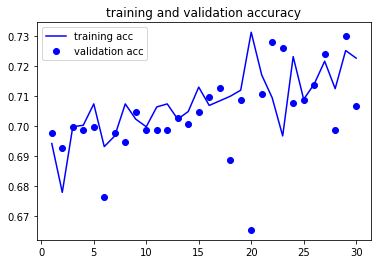

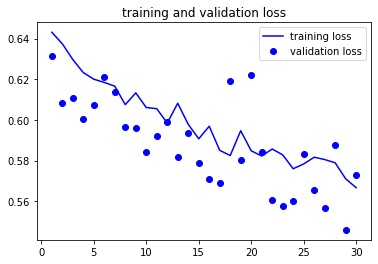

In [15]:
import matplotlib.pyplot as plt
acc=aug_result.history['acc']
val_acc=aug_result.history['val_acc']
loss=aug_result.history['loss']
val_loss=aug_result.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()